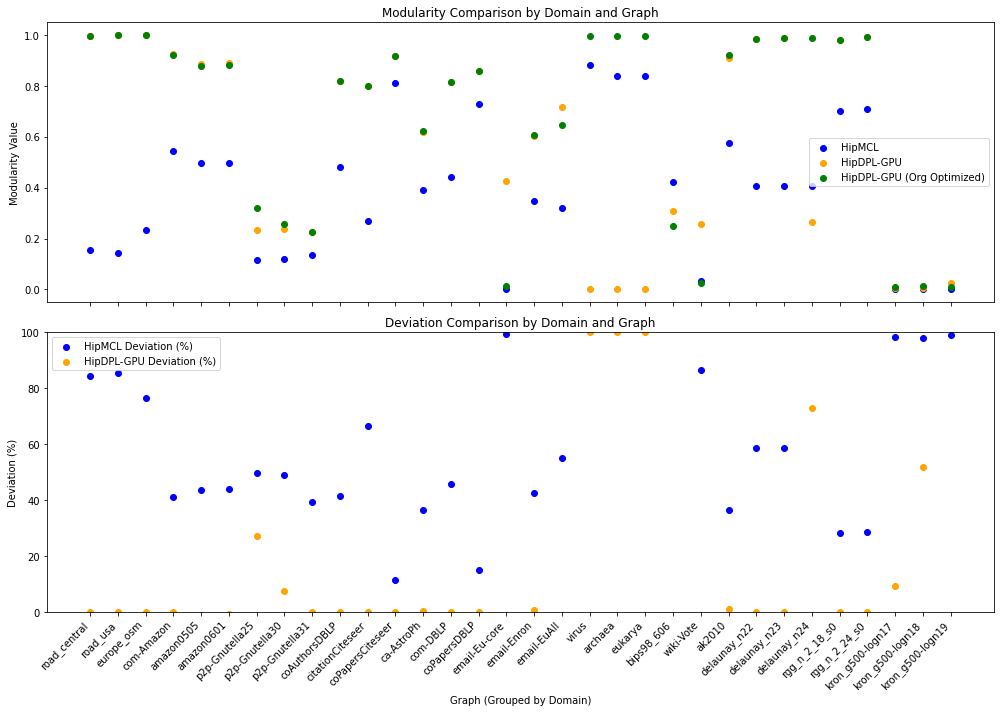

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file and clean up column names by stripping extra whitespace
file_path = 'modularity_values.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace in column names

# Verify column names and adjust if needed
expected_columns = [
    "graph", "HipMCL (igraph)", "HipDPL-GPU (igraph)", "edges", "domain", 
    "HipDPL-GPU (org. optimized)", "Deviation (%) HipDPL-GPU (igraph)", "Deviation(%) HipMCL (igraph)"
]

for col in expected_columns:
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found. Available columns: {df.columns.tolist()}")

# Define custom domain order and apply sorting within domains by edge count
domain_order = ["Road", "Consumer", "Internet", "Citation", "Collaboration", 
                "Communication", "Protein", "Web", "Social", "Other", "Delaunay", "Rgg", "Rmat"]
df['domain'] = pd.Categorical(df['domain'], categories=domain_order, ordered=True)
df.sort_values(['domain', 'edges'], inplace=True)

# Set up subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First plot: Modularity values
ax1.scatter(df['graph'], df['HipMCL (igraph)'], color='blue', label='HipMCL')
ax1.scatter(df['graph'], df['HipDPL-GPU (igraph)'], color='orange', label='HipDPL-GPU')
ax1.scatter(df['graph'], df['HipDPL-GPU (org. optimized)'], color='green', label='HipDPL-GPU (Org Optimized)')
ax1.set_ylabel('Modularity Value')
ax1.set_title('Modularity Comparison by Domain and Graph')
ax1.legend()

# Second plot: Deviation percentages
ax2.scatter(df['graph'], df['Deviation(%) HipMCL (igraph)'], color='blue', label='HipMCL Deviation (%)')
ax2.scatter(df['graph'], df['Deviation (%) HipDPL-GPU (igraph)'], color='orange', label='HipDPL-GPU Deviation (%)')
ax2.set_ylim(0, 100)  # Set y-axis limit to 100 for percentage scaling
ax2.set_ylabel('Deviation (%)')
ax2.set_title('Deviation Comparison by Domain and Graph')
ax2.legend()

# Set x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Graph (Grouped by Domain)')
plt.tight_layout()

# Show plot
plt.show()
